In [1]:
# Starters
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from scipy.stats import linregress
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Spending File Pathing
health_spending_csv = Path("Resources/Health Care Expenditures per Capita by State of Residence raw data.csv")

#pd.read
spending_data = pd.read_csv(health_spending_csv,skiprows=[0,1])
spending_data = spending_data.dropna(axis=0,how='any',subset=["Health Spending per Capita"])
spending_data["Health Spending per Capita"] = spending_data["Health Spending per Capita"].str.replace(',', '').str.replace('$', '').astype(int)
spending_data["Health Spending per Capita"] = spending_data["Health Spending per Capita"].astype(float)
spending_data.head()

C:\Users\Admin\anaconda3\envs\pyData2\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  import sys


,Location,Health Spending per Capita
0,United States,9671.0
1,Alabama,8741.0
2,Alaska,13226.0
3,Arizona,8145.0
4,Arkansas,8853.0


In [3]:
# Coverage File Pathing
health_coverage_csv = Path("Resources/Health Insurance Coverage of the Total Population raw data #.csv")

#pd.read
coverage_data = pd.read_csv(health_coverage_csv,skiprows=[0,1])
coverage_data = coverage_data.dropna(axis=0,how='any',subset=["Employer"])
#coverage_data["Employer"] = coverage_data["Employer"].map("{:,}".format)
#coverage_data["Non-Group"] = coverage_data["Non-Group"].map("{:,}".format)
#coverage_data["Medicaid"] = coverage_data["Medicaid"].map("{:,}".format)
#coverage_data["Medicare"] = coverage_data["Medicare"].map("{:,}".format)
#coverage_data["Military"] = coverage_data["Military"].map("{:,}".format)
#coverage_data["Uninsured"] = coverage_data["Uninsured"].map("{:,}".format)
#coverage_data["Total"] = coverage_data["Total"].map("{:,}".format)
coverage_data.head()

,Location,Employer,Non-Group,Medicaid,Medicare,Military,Uninsured,Total,Footnotes
0,United States,158000000.0,18728800.0,63145700.0,45286700.0,4393600.0,29349300.0,319000000.0,1.0
1,Alabama,2250900.0,263400.0,929500.0,763800.0,99000.0,460400.0,4767100.0,NaN
2,Alaska,339800.0,24700.0,149400.0,70200.0,37100.0,80500.0,701700.0,NaN
3,Arizona,3202000.0,366500.0,1489600.0,1145300.0,105600.0,789100.0,7098000.0,NaN
4,Arkansas,1226300.0,157300.0,767000.0,464200.0,41800.0,265800.0,2922500.0,NaN


In [4]:
# Merging
merged_per_state = pd.merge( spending_data, coverage_data, how="left", on=["Location", "Location"] )
merged_per_state.head()

,Location,Health Spending per Capita,Employer,Non-Group,Medicaid,Medicare,Military,Uninsured,Total,Footnotes
0,United States,9671.0,158000000.0,18728800.0,63145700.0,45286700.0,4393600.0,29349300.0,319000000.0,1.0
1,Alabama,8741.0,2250900.0,263400.0,929500.0,763800.0,99000.0,460400.0,4767100.0,NaN
2,Alaska,13226.0,339800.0,24700.0,149400.0,70200.0,37100.0,80500.0,701700.0,NaN
3,Arizona,8145.0,3202000.0,366500.0,1489600.0,1145300.0,105600.0,789100.0,7098000.0,NaN
4,Arkansas,8853.0,1226300.0,157300.0,767000.0,464200.0,41800.0,265800.0,2922500.0,NaN


In [5]:
#Mortality File Pathing
hd_mortality_csv = Path("Resources/Heart Disease Mortality by State data table.csv")

#pd.read
mortality_data = pd.read_csv(hd_mortality_csv)
mortality_data = mortality_data.loc[(mortality_data["YEAR"] == 2019)]
mortality_data = mortality_data.reset_index(drop=True)
XX_to_full = {"AL":"Alabama",
              "AK":"Alaska",
              "AZ":"Arizona",
              "AR":"Arkansas",
              "CA":"California",
              "CO":"Colorado",
              "CT":"Connecticut",
              "DE":"Delaware",
              "DC":"District of Columbia",
              "FL":"Florida",
              "GA":"Georgia",
              "HI":"Hawaii",
              "ID":"Idaho",
              "IL":"Illinois",
              "IN":"Indiana",
              "IA":"Iowa",
              "KS":"Kansas",
              "KY":"Kentucky",
              "LA":"Louisiana",
              "ME":"Maine",
              "MD":"Maryland",
              "MA":"Massachusetts",
              "MI":"Michigan",
              "MN":"Minnesota",
              "MS":"Mississippi",
              "MO":"Missouri",
              "MT":"Montana",
              "NE":"Nebraska",
              "NV":"Nevada",
              "NH":"New Hampshire",
              "NJ":"New Jersey",
              "NM":"New Mexico",
              "NY":"New York",
              "NC":"North Carolina",
              "ND":"North Dakota",
              "MP":"Northern Mariana Islands",
              "OH":"Ohio",
              "OK":"Oklahoma",
              "OR":"Oregon",
              "PA":"Pennsylvania",
              "PR":"Puerto Rico",
              "RI":"Rhode Island",
              "SC":"South Carolina",
              "SD":"South Dakota",
              "TN":"Tennessee",
              "TX":"Texas",
              "UT":"Utah",
              "VT":"Vermont",
              "VA":"Virginia",
              "VI":"Virgin Islands",
              "WA":"Washington",
              "WV":"West Virginia",
              "WI":"Wisconsin",
              "WY":"Wyoming"}
mortality_data["STATE"]=mortality_data["STATE"].replace(XX_to_full)
mortality_data = mortality_data.rename(columns={"STATE":"Location"})
mortality_data = mortality_data.rename(columns={"YEAR":"Year"})
mortality_data = mortality_data.rename(columns={"RATE":"Deaths per 100k"})
mortality_data = mortality_data.rename(columns={"DEATHS":"Mortality"})
mortality_data["Mortality"] = mortality_data["Mortality"].astype(float)
mortality_data.head()

,Year,Location,Deaths per 100k,Mortality
0,2019,Alabama,219.6,13448.0
1,2019,Alaska,129.7,843.0
2,2019,Arizona,134.0,12587.0
3,2019,Arkansas,226.5,8669.0
4,2019,California,136.9,62394.0


In [6]:
#final merge
full_combined =  pd.merge( merged_per_state, mortality_data, how="left", on=["Location", "Location"])
full_combined = full_combined.dropna(axis=0,how='any',subset=["Year"])
full_combined.head()

,Location,Health Spending per Capita,Employer,Non-Group,Medicaid,Medicare,Military,Uninsured,Total,Footnotes,Year,Deaths per 100k,Mortality
1,Alabama,8741.0,2250900.0,263400.0,929500.0,763800.0,99000.0,460400.0,4767100.0,NaN,2019.0,219.6,13448.0
2,Alaska,13226.0,339800.0,24700.0,149400.0,70200.0,37100.0,80500.0,701700.0,NaN,2019.0,129.7,843.0
3,Arizona,8145.0,3202000.0,366500.0,1489600.0,1145300.0,105600.0,789100.0,7098000.0,NaN,2019.0,134.0,12587.0
4,Arkansas,8853.0,1226300.0,157300.0,767000.0,464200.0,41800.0,265800.0,2922500.0,NaN,2019.0,226.5,8669.0
5,California,9628.0,18538700.0,2569600.0,9790000.0,4388900.0,350200.0,3005400.0,38642700.0,NaN,2019.0,136.9,62394.0


In [7]:
#national mean grouping

national_avg_spending = full_combined["Health Spending per Capita"].mean()
national_avg_employer = full_combined["Employer"].mean()
national_avg_non_group = full_combined["Non-Group"].mean()
national_avg_medicaid = full_combined["Medicaid"].mean()
national_avg_military = full_combined["Military"].mean()
national_avg_uninsured = full_combined["Uninsured"].mean()
national_avg_total = full_combined["Total"].mean()
national_avg_deaths_per = full_combined["Deaths per 100k"].mean()

national_avg_data = pd.DataFrame({"Average Health Spending per Capita" : [national_avg_spending],
                                 "Average Employer Coverage" : [national_avg_employer],
                                 "Average Non-Group Coverage" : [national_avg_non_group],
                                 "Average Medicaid Coverage" : [national_avg_medicaid],
                                 "Average Military Coverage" : [national_avg_military],
                                 "Average Uninsured" : [national_avg_uninsured],
                                 "Average Total Coverage" : [national_avg_total],
                                 "Average Deaths per 100k" : [national_avg_deaths_per]})
                                  
national_avg_data

,Average Health Spending per Capita,Average Employer Coverage,Average Non-Group Coverage,Average Medicaid Coverage,Average Military Coverage,Average Uninsured,Average Total Coverage,Average Deaths per 100k
0,9860.64,3159540.0,373706.0,1259500.0,87692.0,586498.0,6371556.0,163.688


In [8]:
national_avg_titles = ["# of People on Employer Coverage (Per State)",
                       "# of People on Non-Group Coverage (Per State)",
                       "# of People on Medicaid Coverage (Per State)",
                       "# of People on Military Coverage (Per State)",
                       "# of People on Uninsured (Per State)"]
                       #"Total Total Coverage",
                       #"Total Mortality"]
national_avg_list = [national_avg_employer,
                     national_avg_non_group,
                     national_avg_medicaid,
                     national_avg_military,
                     national_avg_uninsured]
                     #national_sum_total,
                     #national_sum_deaths]
national_avg_table = pd.DataFrame({"Coverage Types": national_avg_titles,
                                   "Average Number of People Per Type (Per State)" : national_avg_list})
national_avg_table
#5466936

,Coverage Types,Average Number of People Per Type (Per State)
0,# of People on Employer Coverage (Per State),3159540.0
1,# of People on Non-Group Coverage (Per State),373706.0
2,# of People on Medicaid Coverage (Per State),1259500.0
3,# of People on Military Coverage (Per State),87692.0
4,# of People on Uninsured (Per State),586498.0


# Graph for Average State Level Coverage Types

Text(0, 0.5, 'Average Number of People Per Type Per State (In Millions)')

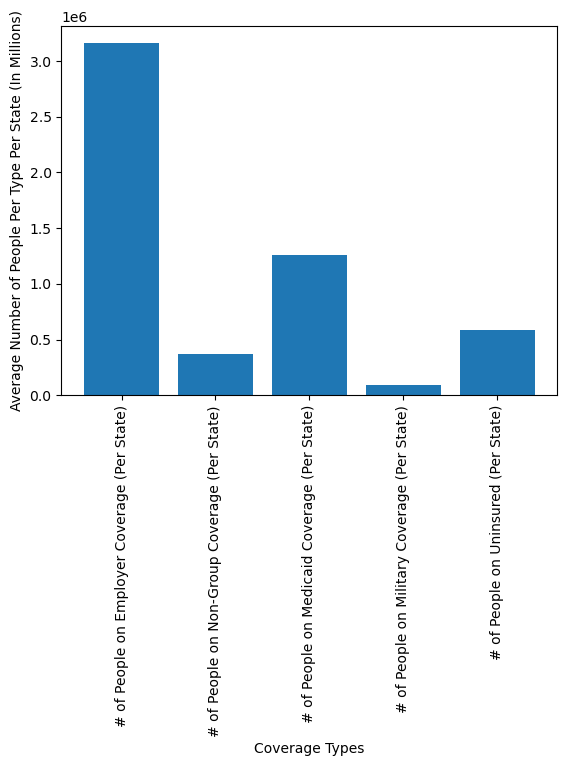

In [9]:
#national_avg_table.plot.bar(x="Titles",y="Data")

plt.bar(national_avg_table["Coverage Types"], national_avg_table["Average Number of People Per Type (Per State)"], align="center")
plt.xlabel("Coverage Types")
plt.xticks(national_avg_table["Coverage Types"], rotation="vertical")
#plt.yticks(national_avg_table["Average Number of People Per Type Per State (In Millions)"])
plt.ylabel("Average Number of People Per Type Per State (In Millions)")

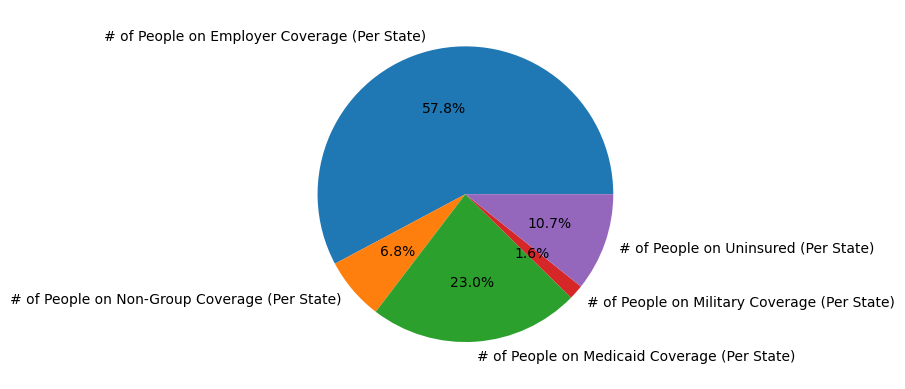

In [10]:
plt.pie(national_avg_list, labels=national_avg_titles, autopct="%1.1f%%")
plt.show()                           

In [11]:
#national sum grouping

national_sum_spending = full_combined["Health Spending per Capita"].sum()
national_sum_employer = full_combined["Employer"].sum()
national_sum_non_group = full_combined["Non-Group"].sum()
national_sum_medicaid = full_combined["Medicaid"].sum()
national_sum_military = full_combined["Military"].sum()
national_sum_uninsured = full_combined["Uninsured"].sum()
national_sum_total = full_combined["Total"].sum()
national_sum_deaths = full_combined["Mortality"].sum()

national_sum_data = pd.DataFrame({"Total Health Spending per Capita" : [national_sum_spending],
                                 "Total Employer Coverage" : [national_sum_employer],
                                 "Total Non-Group Coverage" : [national_sum_non_group],
                                 "Total Medicaid Coverage" : [national_sum_medicaid],
                                 "Total Military Coverage" : [national_sum_military],
                                 "Total Uninsured" : [national_sum_uninsured],
                                 "Total Total Coverage" : [national_sum_total],
                                 "Total Mortality" : [national_sum_deaths]})
national_sum_data

,Total Health Spending per Capita,Total Employer Coverage,Total Non-Group Coverage,Total Medicaid Coverage,Total Military Coverage,Total Uninsured,Total Total Coverage,Total Mortality
0,493032.0,157977000.0,18685300.0,62975000.0,4384600.0,29324900.0,318577800.0,657854.0


In [12]:
national_sum_titles = ["# of People Total Employer Coverage (Nation-Wide)",
                       "# of People Total Non-Group Coverage (Nation-Wide)",
                       "# of People Total Medicaid Coverage (Nation-Wide)",
                       "# of People Total Military Coverage (Nation-Wide)",
                       "# of People Total Uninsured (Nation-Wide)"]
                       #"Total Total Coverage",
                       #"Total Mortaility"]
national_sum_list = [national_sum_employer,
                     national_sum_non_group,
                     national_sum_medicaid,
                     national_sum_military,
                     national_sum_uninsured]
                     #national_sum_total,
                     #national_sum_deaths]
national_sum_table = pd.DataFrame({"Coverage Types": national_sum_titles,
                                   "Number of People Per Type (Nation-Wide)" : national_sum_list})
national_sum_table
#273346800

,Coverage Types,Number of People Per Type (Nation-Wide)
0,# of People Total Employer Coverage (Nation-Wide),157977000.0
1,# of People Total Non-Group Coverage (Nation-W...,18685300.0
2,# of People Total Medicaid Coverage (Nation-Wide),62975000.0
3,# of People Total Military Coverage (Nation-Wide),4384600.0
4,# of People Total Uninsured (Nation-Wide),29324900.0


# Graph for Full National Level Coverage Types (needs work)

Text(0, 0.5, 'Total Number of People (Nation-Wide) Per Type (In Millions)')

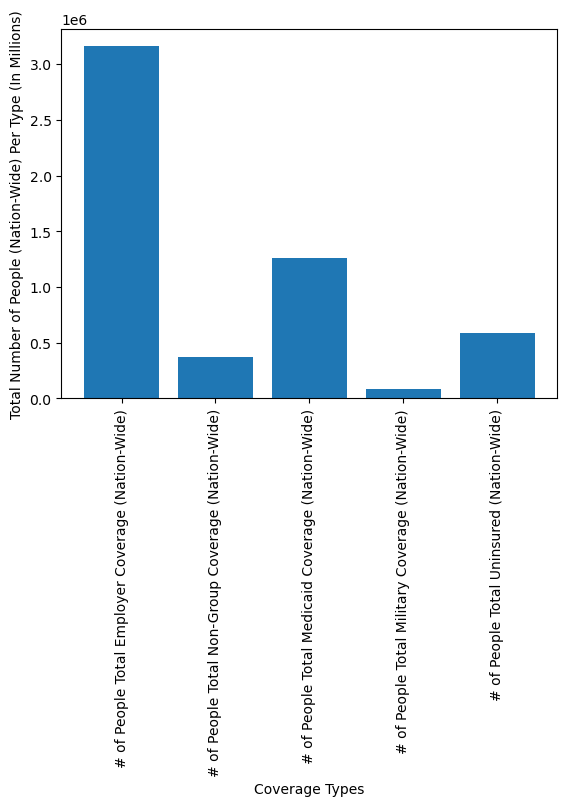

In [13]:
plt.bar(national_sum_table["Coverage Types"], national_avg_table["Average Number of People Per Type (Per State)"], align="center")
plt.xlabel("Coverage Types")
plt.xticks(national_sum_table["Coverage Types"], rotation="vertical")
#plt.yticks(national_sum_table["Number of People Per Type (Nation-Wide)"])
plt.ylabel("Total Number of People (Nation-Wide) Per Type (In Millions)")

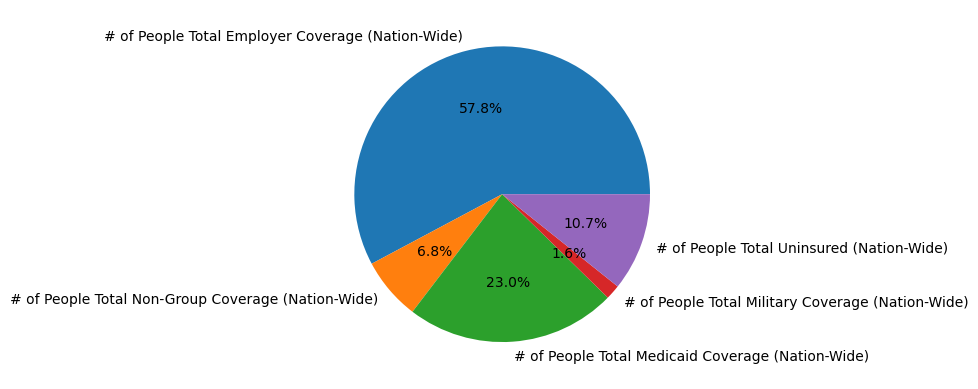

In [14]:
plt.pie(national_sum_list, labels=national_sum_titles, autopct="%1.1f%%")
plt.show()   

# State level coverage types (percent)

In [15]:
#percentages of data
health_coverage_p_csv = Path("Resources/Health Insurance Coverage of the Total Population raw data %.csv")

#pd.read
coverage_data_p = pd.read_csv(health_coverage_p_csv,skiprows=[0,1])
coverage_data_p = coverage_data_p.dropna(axis=0,how='any',subset=["Employer"])
coverage_data_p = coverage_data_p.rename(columns={"Employer":"Employer %"})
coverage_data_p["Employer %"] = coverage_data_p["Employer %"] * 100
coverage_data_p = coverage_data_p.rename(columns={"Non-Group":"Non-Group %"})
coverage_data_p["Non-Group %"] = coverage_data_p["Non-Group %"] * 100
coverage_data_p = coverage_data_p.rename(columns={"Medicaid":"Medicaid %"})
coverage_data_p["Medicaid %"] = coverage_data_p["Medicaid %"] * 100
coverage_data_p = coverage_data_p.rename(columns={"Medicare":"Medicare %"})
coverage_data_p["Medicare %"] = coverage_data_p["Medicare %"] * 100
coverage_data_p = coverage_data_p.rename(columns={"Military":"Military %"})
coverage_data_p["Military %"] = coverage_data_p["Military %"] * 100
coverage_data_p = coverage_data_p.rename(columns={"Uninsured":"Uninsured %"})
coverage_data_p["Uninsured %"] = coverage_data_p["Uninsured %"] * 100
coverage_data_p = coverage_data_p.rename(columns={"Total":"Total %"})
coverage_data_p["Total %"] = coverage_data_p["Total %"] * 100
coverage_data_p.head()

,Location,Employer %,Non-Group %,Medicaid %,Medicare %,Military %,Uninsured %,Total %,Footnotes
0,United States,49.6,5.9,19.8,14.2,1.4,9.2,100.0,1.0
1,Alabama,47.2,5.5,19.5,16.0,2.1,9.7,100.0,NaN
2,Alaska,48.4,3.5,21.3,10.0,5.3,11.5,100.0,NaN
3,Arizona,45.1,5.2,21.0,16.1,1.5,11.1,100.0,NaN
4,Arkansas,42.0,5.4,26.2,15.9,1.4,9.1,100.0,NaN


# Took Mortaility vs Total State in %

In [16]:
full_combined["Mortality vs State Population (%)"] = (100 / full_combined["Total"]) * full_combined["Mortality"] 
full_combined.head()

,Location,Health Spending per Capita,Employer,Non-Group,Medicaid,Medicare,Military,Uninsured,Total,Footnotes,Year,Deaths per 100k,Mortality,Mortality vs State Population (%)
1,Alabama,8741.0,2250900.0,263400.0,929500.0,763800.0,99000.0,460400.0,4767100.0,NaN,2019.0,219.6,13448.0,0.282100
2,Alaska,13226.0,339800.0,24700.0,149400.0,70200.0,37100.0,80500.0,701700.0,NaN,2019.0,129.7,843.0,0.120137
3,Arizona,8145.0,3202000.0,366500.0,1489600.0,1145300.0,105600.0,789100.0,7098000.0,NaN,2019.0,134.0,12587.0,0.177332
4,Arkansas,8853.0,1226300.0,157300.0,767000.0,464200.0,41800.0,265800.0,2922500.0,NaN,2019.0,226.5,8669.0,0.296630
5,California,9628.0,18538700.0,2569600.0,9790000.0,4388900.0,350200.0,3005400.0,38642700.0,NaN,2019.0,136.9,62394.0,0.161464


# Copied Dataframe to organize by Morality % Values

In [17]:
mortality_copy = full_combined
mortality_copy = mortality_copy.sort_values("Mortality vs State Population (%)", ascending=False)
mortality_copy = mortality_copy.reset_index(drop=True)
mortality_copy.head()

,Location,Health Spending per Capita,Employer,Non-Group,Medicaid,Medicare,Military,Uninsured,Total,Footnotes,Year,Deaths per 100k,Mortality,Mortality vs State Population (%)
0,Arkansas,8853.0,1226300.0,157300.0,767000.0,464200.0,41800.0,265800.0,2922500.0,NaN,2019.0,226.5,8669.0,0.296630
1,West Virginia,11951.0,764600.0,43800.0,462600.0,330500.0,23000.0,114500.0,1739000.0,NaN,2019.0,197.4,5087.0,0.292524
2,Oklahoma,8923.0,1742700.0,209300.0,651600.0,576900.0,75600.0,571000.0,3826900.0,NaN,2019.0,231.4,10960.0,0.286394
3,Alabama,8741.0,2250900.0,263400.0,929500.0,763800.0,99000.0,460400.0,4767100.0,NaN,2019.0,219.6,13448.0,0.282100
4,Mississippi,8745.0,1209700.0,135500.0,693100.0,407000.0,51500.0,370300.0,2867100.0,NaN,2019.0,226.7,7997.0,0.278923


# Copied Dataframe to organize by full Morality Values

In [18]:
mortality_copy_2 = full_combined
mortality_copy_2 = mortality_copy_2.sort_values("Mortality", ascending=False)
mortality_copy_2 = mortality_copy_2.reset_index(drop=True)
mortality_copy_2.head()

,Location,Health Spending per Capita,Employer,Non-Group,Medicaid,Medicare,Military,Uninsured,Total,Footnotes,Year,Deaths per 100k,Mortality,Mortality vs State Population (%)
0,California,9628.0,18538700.0,2569600.0,9790000.0,4388900.0,350200.0,3005400.0,38642700.0,NaN,2019.0,136.9,62394.0,0.161464
1,Florida,9490.0,8454200.0,1995300.0,3643200.0,3776000.0,366300.0,2757000.0,20992000.0,NaN,2019.0,140.1,47144.0,0.224581
2,Texas,8028.0,13461200.0,1603200.0,4490000.0,3069700.0,455100.0,5207000.0,28286200.0,NaN,2019.0,163.4,46139.0,0.163115
3,New York,12932.0,9423800.0,1094500.0,4852600.0,2455600.0,81700.0,1000100.0,18908300.0,NaN,2019.0,166.6,43806.0,0.231676
4,Pennsylvania,11175.0,6413400.0,636800.0,2506200.0,2015200.0,97100.0,709100.0,12377600.0,NaN,2019.0,172.9,32299.0,0.260947


# # Copied Dataframe to organize by Deaths per 100k (similar to Mortality %)

In [19]:
mortality_copy_3 = full_combined
mortality_copy_3 = mortality_copy_3.sort_values("Deaths per 100k", ascending=False)
mortality_copy_3 = mortality_copy_3.reset_index(drop=True)
mortality_copy_3.head()

,Location,Health Spending per Capita,Employer,Non-Group,Medicaid,Medicare,Military,Uninsured,Total,Footnotes,Year,Deaths per 100k,Mortality,Mortality vs State Population (%)
0,Oklahoma,8923.0,1742700.0,209300.0,651600.0,576900.0,75600.0,571000.0,3826900.0,NaN,2019.0,231.4,10960.0,0.286394
1,Mississippi,8745.0,1209700.0,135500.0,693100.0,407000.0,51500.0,370300.0,2867100.0,NaN,2019.0,226.7,7997.0,0.278923
2,Arkansas,8853.0,1226300.0,157300.0,767000.0,464200.0,41800.0,265800.0,2922500.0,NaN,2019.0,226.5,8669.0,0.296630
3,Alabama,8741.0,2250900.0,263400.0,929500.0,763800.0,99000.0,460400.0,4767100.0,NaN,2019.0,219.6,13448.0,0.282100
4,Louisiana,9657.0,1882500.0,219500.0,1316800.0,618600.0,61100.0,400200.0,4498600.0,NaN,2019.0,207.8,11302.0,0.251234


# Merged Dataframes Copies for top 5 and low 5

In [20]:
# Merging
merged_mortality_n_coverage = pd.merge(mortality_copy, coverage_data_p, how="left", on=["Location", "Location"] )

merged_mortality_n_coverage_clean = pd.DataFrame({"Location" : merged_mortality_n_coverage["Location"],
                                                  "State Population" : merged_mortality_n_coverage["Total"],
                                                  "Mortality" : merged_mortality_n_coverage["Mortality"],
                                                  "Mortality vs State Population (%)" : merged_mortality_n_coverage["Mortality vs State Population (%)"],
                                                  "Employer %" : merged_mortality_n_coverage["Employer %"],
                                                  "Non-Group %" : merged_mortality_n_coverage["Non-Group %"],
                                                  "Medicaid %" : merged_mortality_n_coverage["Medicaid %"],
                                                  "Military %" : merged_mortality_n_coverage["Military %"],
                                                  "Uninsured %" : merged_mortality_n_coverage["Uninsured %"]})
merged_mortality_n_coverage_clean.head()

,Location,State Population,Mortality,Mortality vs State Population (%),Employer %,Non-Group %,Medicaid %,Military %,Uninsured %
0,Arkansas,2922500.0,8669.0,0.296630,42.0,5.4,26.2,1.4,9.1
1,West Virginia,1739000.0,5087.0,0.292524,44.0,2.5,26.6,1.3,6.6
2,Oklahoma,3826900.0,10960.0,0.286394,45.5,5.5,17.0,2.0,14.9
3,Alabama,4767100.0,13448.0,0.282100,47.2,5.5,19.5,2.1,9.7
4,Mississippi,2867100.0,7997.0,0.278923,42.2,4.7,24.2,1.8,12.9


In [21]:
merged_mortality_n_coverage_clean.tail()

,Location,State Population,Mortality,Mortality vs State Population (%),Employer %,Non-Group %,Medicaid %,Military %,Uninsured %
45,Washington,7423900.0,11862.0,0.159781,52.9,5.0,19.8,1.8,6.6
46,Minnesota,5514800.0,8401.0,0.152336,57.8,5.2,16.9,0.7,4.8
47,Colorado,5611800.0,7762.0,0.138316,53.4,6.9,16.8,2.3,7.8
48,Utah,3154100.0,3882.0,0.123078,60.5,9.3,9.3,1.2,9.6
49,Alaska,701700.0,843.0,0.120137,48.4,3.5,21.3,5.3,11.5
